In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
results_file = '../results/encoder-comparisons.csv'

df = pd.read_csv(results_file)
df.head()

,File,Raw,ZIP,PNG,RLE,JP2,CCT
0,(0000)-1-001.dcm,524288,238968,219633,239446,253873,175563
1,(0001)-1-002.dcm,524288,238967,219751,239592,254039,175335
2,(0002)-1-003.dcm,524288,239163,220701,240392,254505,175826
3,(0003)-1-004.dcm,524288,240067,221092,241390,254979,176203
4,(0004)-1-005.dcm,524288,239798,221485,241766,254962,176351


In [21]:

raw = df['Raw']
cols = df.columns[1:]

rates_dict = {}
saved_dict = {}
total_dict = {}

for col in cols:

	rate = raw.sum() / df[col].sum()
	saved = 100 * (1 - df[col].sum() / raw.sum())
	total = df[col].sum() / 1_000_000
	
	rates_dict[col] = rate
	saved_dict[col] = saved
	total_dict[col] = total


In [22]:
rates = pd.DataFrame({"Algorithm": list(rates_dict.keys()), "Compression Rate (X)": list(rates_dict.values())})
saved = pd.DataFrame({"Algorithm": list(saved_dict.keys()), "Space Saved (%)": list(saved_dict.values())})
total = pd.DataFrame({"Algorithm": list(total_dict.keys()), "Total Size (MB)": list(total_dict.values())})

rates

,Algorithm,Compression Rate (X)
0,Raw,1.000000
1,ZIP,2.208277
2,PNG,2.383038
3,RLE,2.151307
4,JP2,2.061459
5,CCT,2.954259


<AxesSubplot:xlabel='Algorithm', ylabel='Compression Rate (X)'>

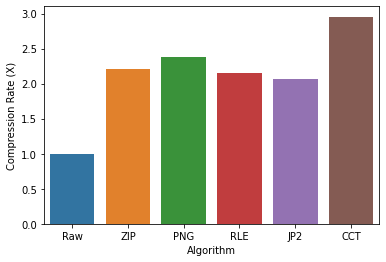

In [23]:
sns.barplot(x = 'Algorithm', y = 'Compression Rate (X)', data = rates)

<AxesSubplot:xlabel='Algorithm', ylabel='Space Saved (%)'>

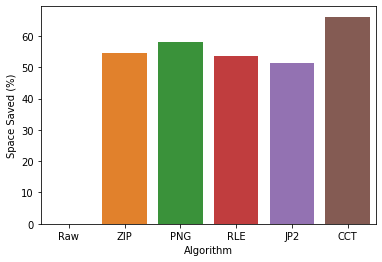

In [24]:
sns.barplot(x = 'Algorithm', y = 'Space Saved (%)', data = saved)

<AxesSubplot:xlabel='Algorithm', ylabel='Total Size (MB)'>

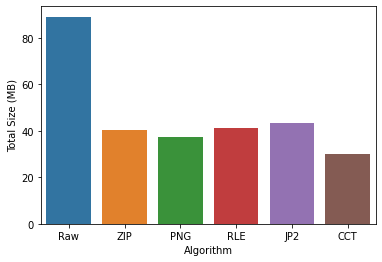

In [25]:
sns.barplot(x = 'Algorithm', y = 'Total Size (MB)', data = total)

In [26]:
def percent_increase(start, final):
	return (final - start) / abs(start)

In [27]:

rates_diff = np.zeros((len(rates_dict), len(rates_dict)), dtype = float)

for i, A in enumerate(rates_dict):
	for j, B in enumerate(rates_dict):
		if A == B: continue

		rates_diff[i, j] = round(percent_increase(rates_dict[A], rates_dict[B]), 2)
	
rates_diff


array([[ 0.  ,  1.21,  1.38,  1.15,  1.06,  1.95],
       [-0.55,  0.  ,  0.08, -0.03, -0.07,  0.34],
       [-0.58, -0.07,  0.  , -0.1 , -0.13,  0.24],
       [-0.54,  0.03,  0.11,  0.  , -0.04,  0.37],
       [-0.51,  0.07,  0.16,  0.04,  0.  ,  0.43],
       [-0.66, -0.25, -0.19, -0.27, -0.3 ,  0.  ]])